# DAT210x - Programming with Python for DS

## Module5- Lab3

In [2]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot') # Look Pretty

A convenience function for you to use:

In [3]:
def clusterInfo(model):
    print("Cluster Analysis Inertia: ", model.inertia_)
    print('------------------------------------------')
    
    for i in range(len(model.cluster_centers_)):
        print("\n  Cluster ", i)
        print("    Centroid ", model.cluster_centers_[i])
        print("    #Samples ", (model.labels_==i).sum()) # NumPy Power

In [4]:
# Find the cluster with the least # attached nodes
def clusterWithFewestSamples(model):
    # Ensure there's at least on cluster...
    minSamples = len(model.labels_)
    minCluster = 0
    
    for i in range(len(model.cluster_centers_)):
        if minSamples > (model.labels_==i).sum():
            minCluster = i
            minSamples = (model.labels_==i).sum()

    print("\n  Cluster With Fewest Samples: ", minCluster)
    return (model.labels_==minCluster)

### CDRs

A [call detail record](https://en.wikipedia.org/wiki/Call_detail_record) (CDR) is a data record produced by a telephone exchange or other telecommunications equipment that documents the details of a telephone call or other telecommunications transaction (e.g., text message) that passes through that facility or device.

The record contains various attributes of the call, such as time, duration, completion status, source number, and destination number. It is the automated equivalent of the paper toll tickets that were written and timed by operators for long-distance calls in a manual telephone exchange.

The dataset we've curated for you contains call records for 10 people, tracked over the course of 3 years. Your job in this assignment is to find out where each of these people likely live and where they work at!

Start by loading up the dataset and taking a peek at its `head` and `dtypes`. You can convert date-strings to real date-time objects using `pd.to_datetime`, and the times using `pd.to_timedelta`:

In [5]:
df = pd.read_csv('Datasets/CDR.csv')
df.CallDate = pd.to_datetime(df.CallDate, errors='coerce')
df.CallTime = pd.to_timedelta(df.CallTime, errors='coerce')
df.Duration = pd.to_timedelta(df.Duration, errors='coerce')

Create a unique list of the phone number values (people) stored in the `In` column of the dataset, and save them in a regular python list called `unique_numbers`. Manually check through `unique_numbers` to ensure the order the numbers appear is the same order they (uniquely) appear in your dataset:

In [8]:
unique_numbers = df.In.unique().tolist()
list_numbers = df.In.unique()
print(unique_numbers)
print(list_numbers)

[4638472273, 1559410755, 4931532174, 2419930464, 1884182865, 3688089071, 4555003213, 2068627935, 2894365987, 8549533077]
[4638472273 1559410755 4931532174 2419930464 1884182865 3688089071
 4555003213 2068627935 2894365987 8549533077]


Using some domain expertise, your intuition should direct you to know that people are likely to behave differently on weekends vs on weekdays:

#### On Weekends
1. People probably don't go into work
1. They probably sleep in late on Saturday
1. They probably run a bunch of random errands, since they couldn't during the week
1. They should be home, at least during the very late hours, e.g. 1-4 AM

#### On Weekdays
1. People probably are at work during normal working hours
1. They probably are at home in the early morning and during the late night
1. They probably spend time commuting between work and home everyday

In [189]:
print("Examining person: ", 8)

Examining person:  8


Create a slice called `user1` that filters to only include dataset records where the `In` feature (user phone number) is equal to the first number on your unique list above:

In [180]:
user1 = df[df.In == unique_numbers[8]]
print(user1.head())

            In         Out Direction   CallDate        CallTime  DOW  \
54  2894365987  7216979669    Missed 2010-12-25 20:22:54.050635  Sat   
55  2894365987  7310853860  Incoming 2010-12-25 20:49:54.149170  Sat   
56  2894365987  3922966733  Incoming 2010-12-25 22:16:09.034602  Sat   
57  2894365987  7310853860  Incoming 2010-12-25 18:53:44.140771  Sat   
58  2894365987  9438365642  Incoming 2010-12-25 21:03:54.219010  Sat   

          Duration                               TowerID   TowerLat   TowerLon  
54 00:05:04.529572  fd8be326-fe13-43c4-b040-c4d0a79f1bc7  32.773611 -96.813611  
55 00:05:32.268988  fd8be326-fe13-43c4-b040-c4d0a79f1bc7  32.773611 -96.813611  
56 00:03:19.924689  7ea8225d-7ce1-407e-b151-637b9cc2868a  32.779167 -96.805000  
57 00:03:51.913510  113cbb89-a693-4702-a563-c0b5b30076d3  32.768861 -96.811000  
58 00:03:15.950917  583c5185-f9ad-406b-a986-4e0bff20f10a  32.773611 -96.813611  


Alter your slice so that it includes only Weekday (Mon-Fri) values:

In [181]:
user1 = user1[(user1.DOW != 'Sat') & (user1.DOW != 'Sun')]
print(user1.head())

             In         Out Direction   CallDate        CallTime  DOW  \
278  2894365987  4570680769    Missed 2010-12-29 19:25:02.467081  Wed   
279  2894365987   616374815  Incoming 2010-12-29 19:26:20.314938  Wed   
280  2894365987   641312305  Incoming 2010-12-29 09:20:40.138450  Wed   
281  2894365987  3348173258    Missed 2010-12-29 20:03:03.133057  Wed   
282  2894365987   616374815  Incoming 2010-12-29 09:04:39.791627  Wed   

           Duration                               TowerID   TowerLat  \
278 00:11:14.725938  b510a3a2-95f6-43dd-afe1-777c468df56a  32.700667   
279 00:14:02.668387  583c5185-f9ad-406b-a986-4e0bff20f10a  32.773611   
280 00:11:01.864134  fbb206b6-e592-4257-b88f-e279773e9c24  32.721944   
281 00:11:50.739623  fd8be326-fe13-43c4-b040-c4d0a79f1bc7  32.773611   
282 00:13:51.398401  8f8c676c-e676-41eb-b698-26142e84a20b  32.721944   

      TowerLon  
278 -96.914722  
279 -96.813611  
280 -96.892222  
281 -96.813611  
282 -96.892222  


The idea is that the call was placed before 5pm. From Midnight-730a, the user is probably sleeping and won't call / wake up to take a call. There should be a brief time in the morning during their commute to work, then they'll spend the entire day at work. So the assumption is that most of the time is spent either at work, or in 2nd, at home:

In [182]:
user1 = user1[(user1.CallTime < '17:00:00') & (user1.CallTime > '07:30:00')]
print(user1.head())

             In         Out Direction   CallDate        CallTime  DOW  \
280  2894365987   641312305  Incoming 2010-12-29 09:20:40.138450  Wed   
282  2894365987   616374815  Incoming 2010-12-29 09:04:39.791627  Wed   
284  2894365987   265146067  Incoming 2010-12-29 12:46:21.748180  Wed   
286  2894365987  4009221772  Incoming 2010-12-29 10:07:44.700722  Wed   
290  2894365987  5070881310    Missed 2010-12-29 16:33:37.907837  Wed   

           Duration                               TowerID   TowerLat  \
280 00:11:01.864134  fbb206b6-e592-4257-b88f-e279773e9c24  32.721944   
282 00:13:51.398401  8f8c676c-e676-41eb-b698-26142e84a20b  32.721944   
284 00:12:13.438433  8f8c676c-e676-41eb-b698-26142e84a20b  32.721944   
286 00:12:29.344360  8f8c676c-e676-41eb-b698-26142e84a20b  32.721944   
290 00:10:48.379171  282d497a-034e-4423-b9aa-5f61c05d1d11  32.721944   

      TowerLon  
280 -96.892222  
282 -96.892222  
284 -96.892222  
286 -96.892222  
290 -96.892222  


Plot the Cell Towers the user connected to

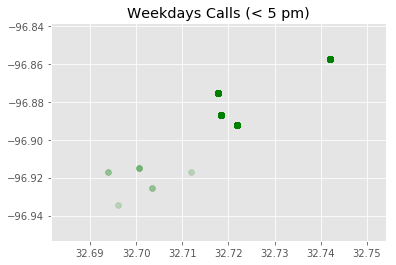

In [183]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(user1.TowerLat,user1.TowerLon, c='g', marker='o', alpha=0.2)
ax.set_title('Weekdays Calls (< 5 pm)')
plt.show()

In [184]:
def doKMeans(data, num_clusters=0):
    # TODO: Be sure to only feed in Lat and Lon coordinates to the KMeans algo, since none of the other
    # data is suitable for your purposes. Since both Lat and Lon are (approximately) on the same scale,
    # no feature scaling is required. Print out the centroid locations and add them onto your scatter
    # plot. Use a distinguishable marker and color.
    #
    # Hint: Make sure you fit ONLY the coordinates, and in the CORRECT order (lat first). This is part
    # of your domain expertise. Also, *YOU* need to create, initialize (and return) the variable named
    # `model` here, which will be a SKLearn K-Means model for this to work:
    
    from sklearn.cluster import KMeans
    
    model = KMeans(n_clusters = num_clusters)
    
    data = data[['TowerLat', 'TowerLon']]
    model.fit(data)
    
    labels = model.predict(data)
    centroids = model.cluster_centers_
    print(centroids)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(data.TowerLat, data.TowerLon, marker='.', alpha=0.3)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='blue', alpha=0.5, linewidths=3, s=169)
    
    return model

Let's tun K-Means with `K=3` or `K=4`. There really should only be a two areas of concentration. If you notice multiple areas that are "hot" (multiple areas the user spends a lot of time at that are FAR apart from one another), then increase K=5, with the goal being that all centroids except two will sweep up the annoying outliers and not-home, not-work travel occasions. the other two will zero in on the user's approximate home location and work locations. Or rather the location of the cell tower closest to them.....

In [185]:
model = doKMeans(user1, 3)

[[ 32.72167395 -96.89200578]
 [ 32.741889   -96.857611  ]
 [ 32.717667   -96.875194  ]]


Print out the mean `CallTime` value for the samples belonging to the cluster with the LEAST samples attached to it. If our logic is correct, the cluster with the MOST samples will be work. The cluster with the 2nd most samples will be home. And the `K=3` cluster with the least samples should be somewhere in between the two. What time, on average, is the user in between home and work, between the midnight and 5pm?

In [186]:
midWayClusterIndices = clusterWithFewestSamples(model)
midWaySamples = user1[midWayClusterIndices]
print("    Its Waypoint Time: ", midWaySamples.CallTime.mean())


  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:49:08.500296


Let's visualize the results! First draw the X's for the clusters:

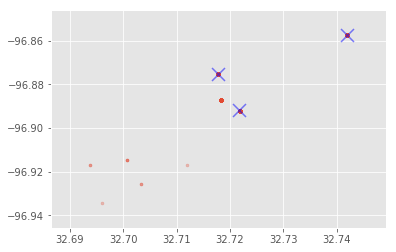

In [187]:
ax.scatter(model.cluster_centers_[:,1], model.cluster_centers_[:,0], s=169, c='r', marker='x', alpha=0.8, linewidths=2)
ax.set_title('Weekday Calls Centroids')

plt.show()

In [188]:
clusterInfo(model)

Cluster Analysis Inertia:  0.0186478636248
------------------------------------------

  Cluster  0
    Centroid  [ 32.72167395 -96.89200578]
    #Samples  3282

  Cluster  1
    Centroid  [ 32.741889 -96.857611]
    #Samples  292

  Cluster  2
    Centroid  [ 32.717667 -96.875194]
    #Samples  177
